# Assignment 4

1. Basic Operations with 1D and 2D NumPy Arrays

In [1]:
import numpy as np

# Global Variables
arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [2]:
def array_operations():
    global arr_1d, arr_2d

    print("1D Array:", arr_1d)
    print("2D Array:\n", arr_2d)

    print("Sum of 1D Array:", np.sum(arr_1d))
    print("Mean of 2D Array:", np.mean(arr_2d))
    print("Transpose of 2D Array:\n", arr_2d.T)

In [3]:
array_operations()

1D Array: [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


2. Image Processing with NumPy

In [4]:
def process_image():
    # Creating a grayscale image
    image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
    print("Original Image:\n", image)

    # Slicing a portion of the image
    cropped = image[1:4, 1:4]
    print("Cropped Section:\n", cropped)

    # Inverting colors
    inverted_image = 255 - image
    print("Inverted Image:\n", inverted_image)

In [5]:
process_image()

Original Image:
 [[250 190 188  64 219]
 [ 17 115 175  99 107]
 [232  78 104 242  60]
 [167 155 240 228 150]
 [ 42  18  60  46 159]]
Cropped Section:
 [[115 175  99]
 [ 78 104 242]
 [155 240 228]]
Inverted Image:
 [[  5  65  67 191  36]
 [238 140  80 156 148]
 [ 23 177 151  13 195]
 [ 88 100  15  27 105]
 [213 237 195 209  96]]


3. Augmented Reality Transformations

In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [9]:
# Load an image (replace 'image.jpg' with the correct image path)
image = cv2.imread('image.jpg')

In [13]:
def scale_image(image, scale_factor):
    scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0], [0, 0, 1]])
    rows, cols = image.shape[:2]
    return cv2.warpPerspective(image, scaling_matrix, (cols, rows))

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

def translate_image(image, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]], dtype=np.float32)
    rows, cols = image.shape[:2]
    return cv2.warpPerspective(image, translation_matrix, (cols, rows))


Original Image


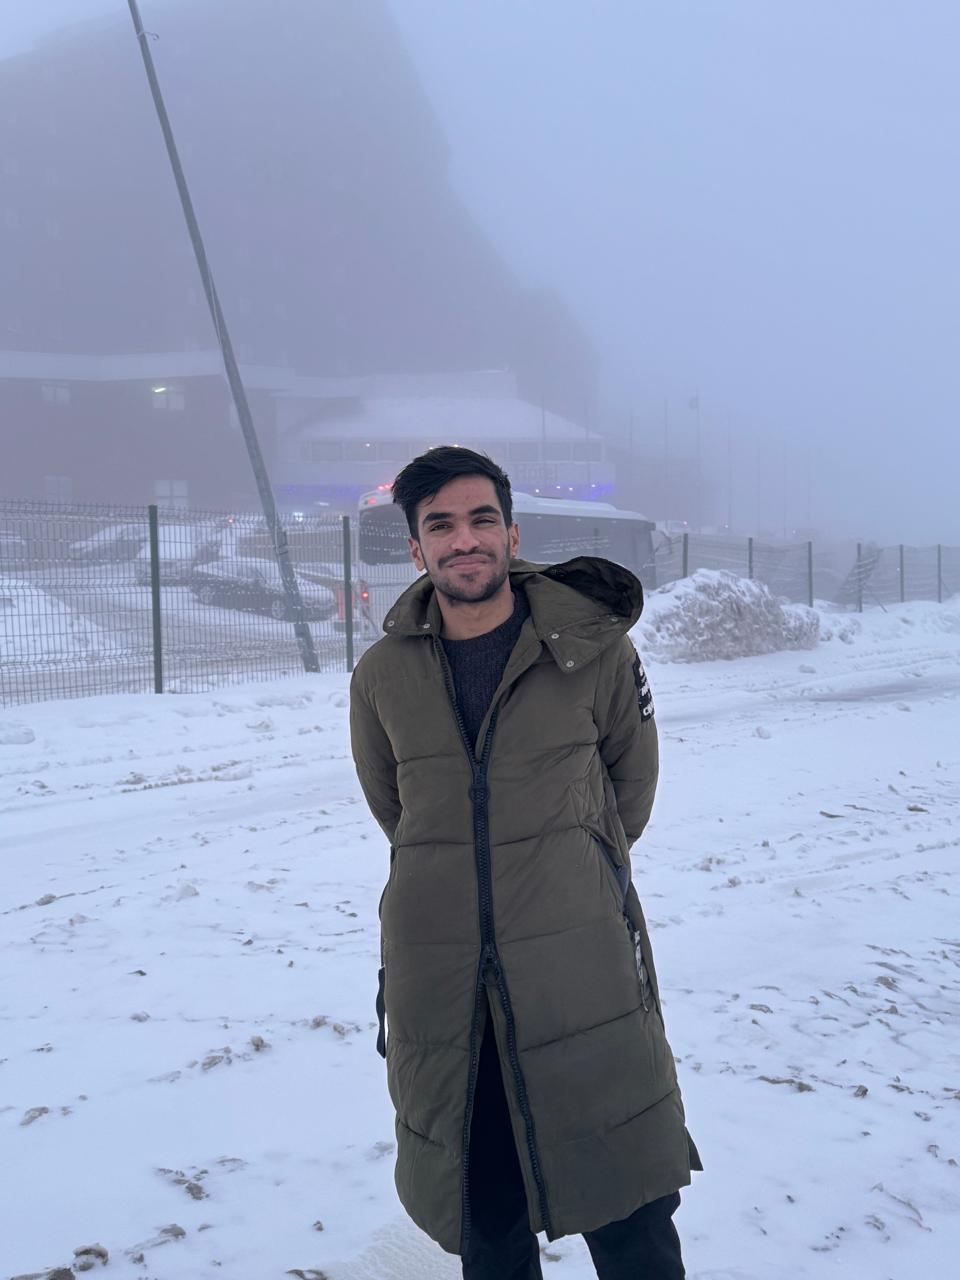

Scaled Image


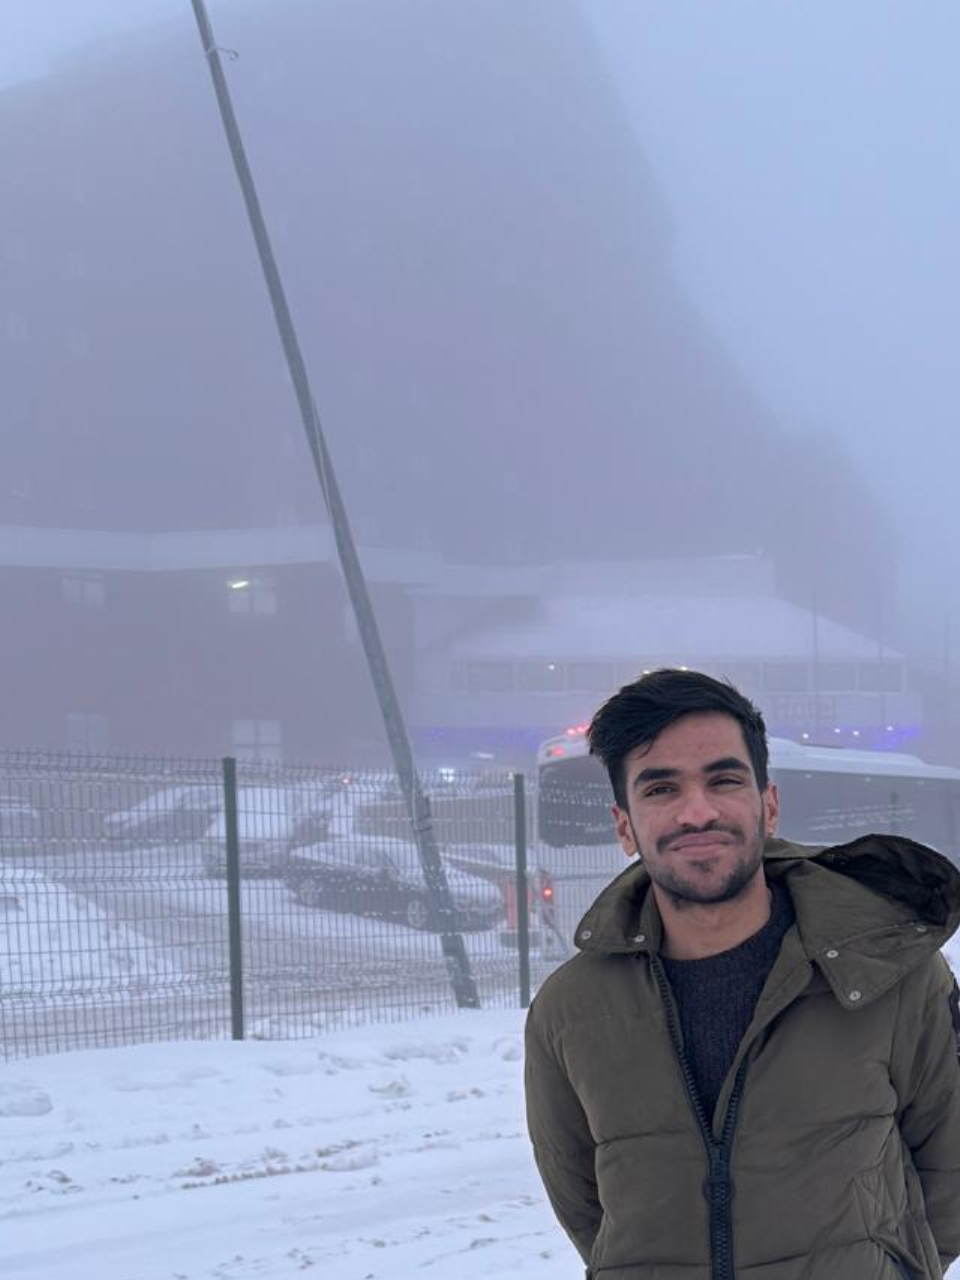

Rotated Image


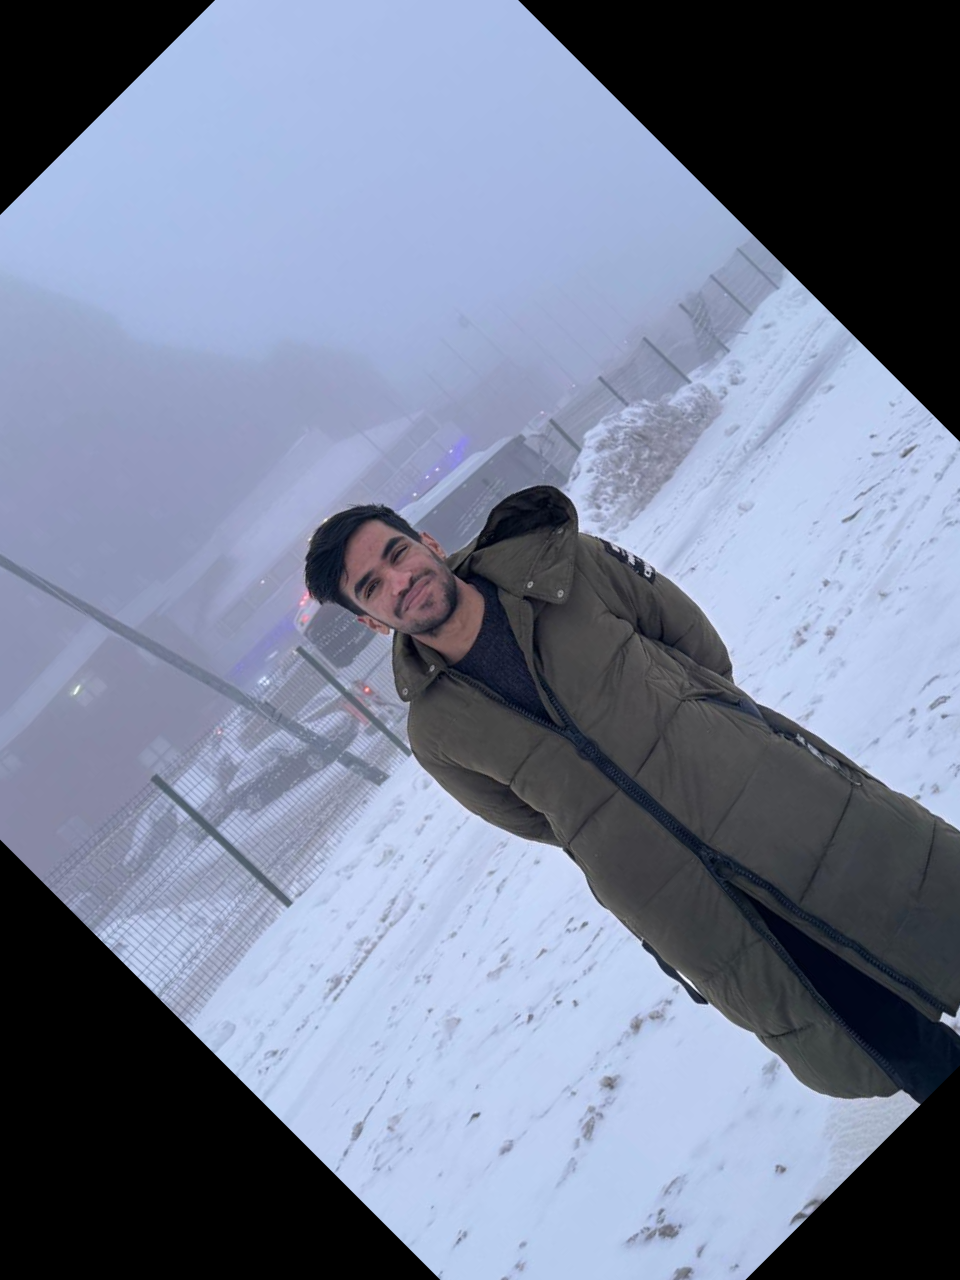

Translated Image


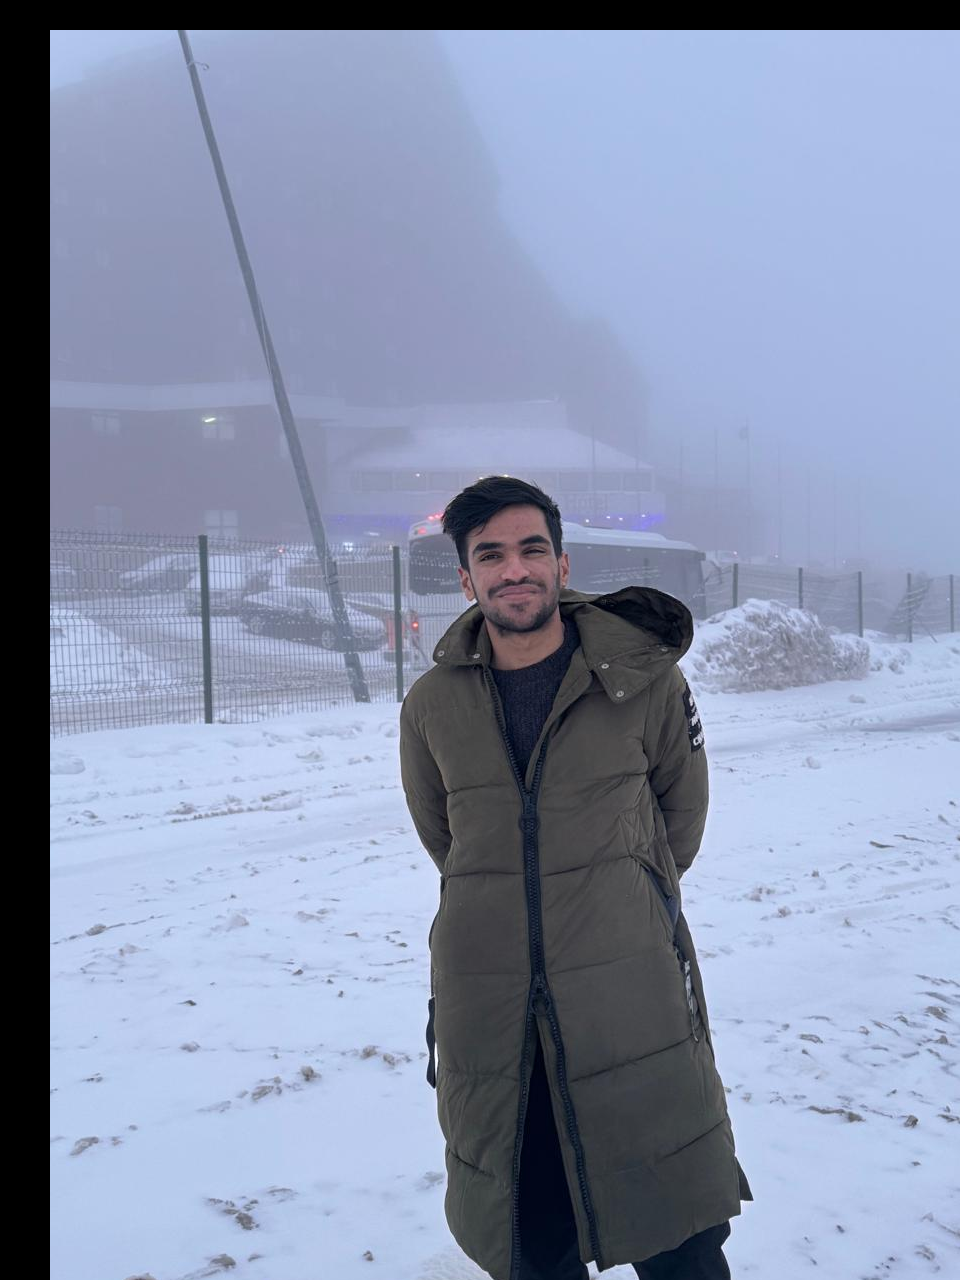

In [18]:
scaled_image = scale_image(image, 1.5)
rotated_image = rotate_image(image, 45)
translated_image = translate_image(image, 50, 30)

print("Original Image")
cv2_imshow(image)

print("Scaled Image")
cv2_imshow(scaled_image)

print("Rotated Image")
cv2_imshow(rotated_image)

print("Translated Image")
cv2_imshow(translated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey(0)
cv2.destroyAllWindows()


4. Face Detection from Image Arrays

In [27]:
import cv2
import numpy as np

In [28]:
image = cv2.imread('image.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [30]:
# Load OpenCV's Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

Face Region


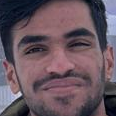

Eye Region


Eye Region


In [31]:
for (x, y, w, h) in faces:
    face_region = image[y:y+h, x:x+w]
    print('Face Region')
    cv2_imshow(face_region)

    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5)

    for (ex, ey, ew, eh) in eyes:
        eye_region = face_region[ey:ey+eh, ex:ex+ew]
        print('Eye Region')
        cv2_imshow(eye_region)

Detected Faces


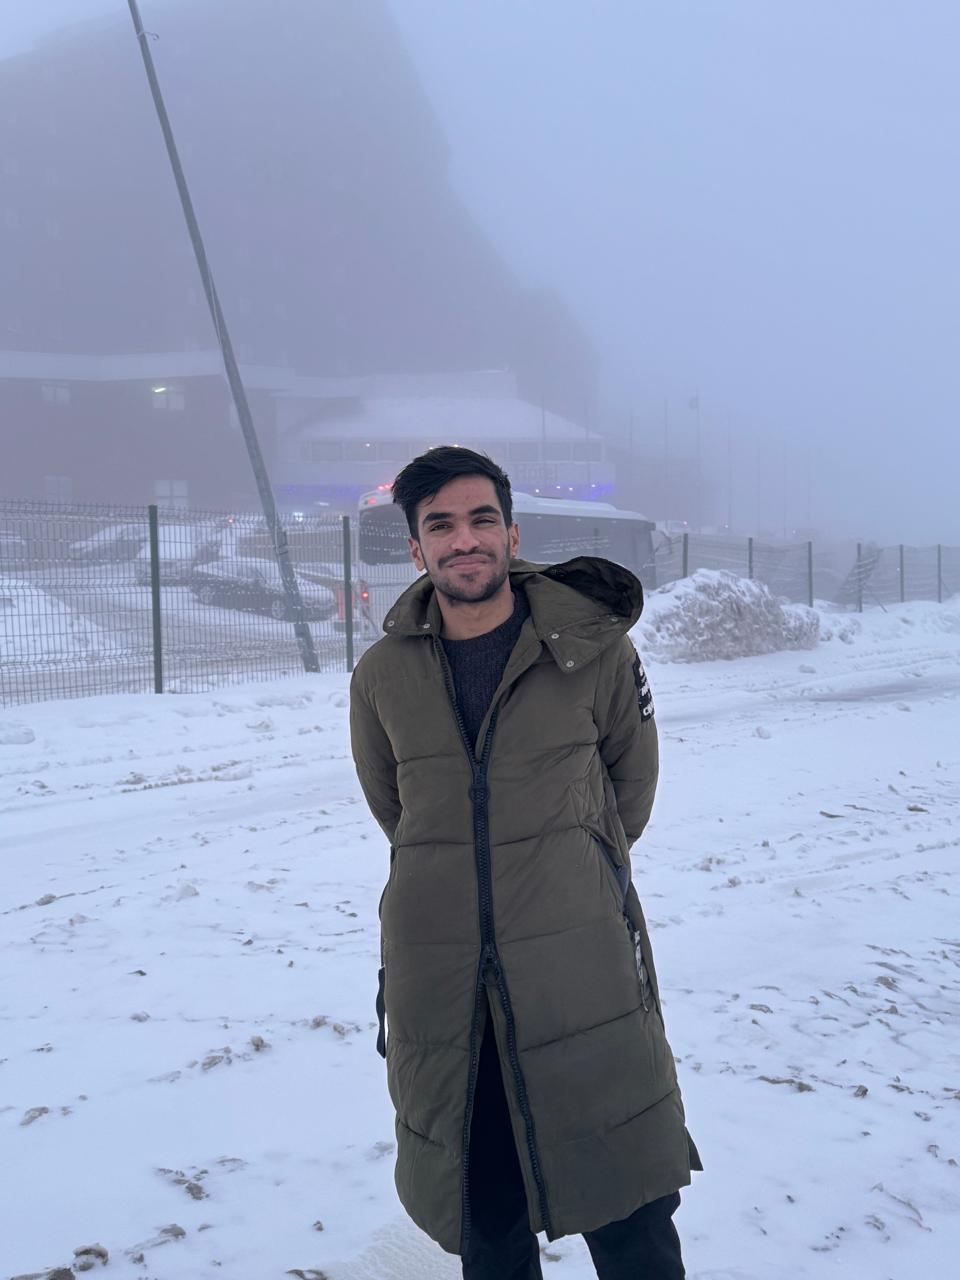

In [32]:
print('Detected Faces')
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()